In [1]:
# Import needed packages and functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the data
nba_data = pd.read_csv('extracted_nba_players_data.csv')
nba_data.columns
nba_data.shape

(1340, 11)

In [3]:

X = nba_data[['total_points', 'tov', 'reb', 'fg']]

y = nba_data[['target_5yrs']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [4]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 10, None],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 4, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [5]:
# Run Grid Search CV for hyperparameter tuning
#DTC = DecisionTreeClassifier()
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=12), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score from grid search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)  #, pos_label='Robusta')
test_precision = precision_score(y_test, y_pred)  #, pos_label='Robusta')

print("Test set accuracy:", test_accuracy)
print('Test set recall:', test_recall) #(y_test, y_pred, pos_label='Robusta'))
print("Test set precision:", test_precision)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation accuracy: 0.6833826373876436
Test set accuracy: 0.664179104477612
Test set recall: 0.7083333333333334
Test set precision: 0.723404255319149


In [6]:
# Initialize the tree and fit the tree
DTC_grid = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, min_samples_leaf=5, min_samples_split=2, random_state=12)
DTC_grid.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=12)

In [7]:
DTC_grid.get_depth()

3

In [8]:
ypred_train = DTC_grid.predict(X_train)
y_pred = DTC_grid.predict(X_test)
print('train accuracy:', DTC_grid.score(X_train, y_train))
print('test accuracy', DTC_grid.score(X_test, y_test))
print('recall_train', metrics.recall_score(y_train, ypred_train))
print('recall test', metrics.recall_score(y_test, y_pred))
print('precision:', metrics.precision_score(y_test, y_pred))

train accuracy: 0.7217484008528785
test accuracy 0.6467661691542289
recall_train 0.805414551607445
recall test 0.7916666666666666
precision: 0.6737588652482269


[Text(0.5, 0.875, 'total_points <= 330.2\nentropy = 0.951\nsamples = 938\nvalue = [347, 591]'),
 Text(0.25, 0.625, 'total_points <= 178.8\nentropy = 0.99\nsamples = 466\nvalue = [261, 205]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'tov <= 0.65\nentropy = 0.937\nsamples = 255\nvalue = [165, 90]'),
 Text(0.0625, 0.125, 'entropy = 0.976\nsamples = 159\nvalue = [94, 65]'),
 Text(0.1875, 0.125, 'entropy = 0.827\nsamples = 96\nvalue = [71, 25]'),
 Text(0.375, 0.375, 'tov <= 1.25\nentropy = 0.994\nsamples = 211\nvalue = [96.0, 115.0]'),
 Text(0.3125, 0.125, 'entropy = 0.98\nsamples = 182\nvalue = [76.0, 106.0]'),
 Text(0.4375, 0.125, 'entropy = 0.894\nsamples = 29\nvalue = [20, 9]'),
 Text(0.75, 0.625, 'total_points <= 738.6\nentropy = 0.685\nsamples = 472\nvalue = [86, 386]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'fg <= 39.65\nentropy = 0.826\nsamples = 297\nvalue = [77, 220]'),
 Text(0.5625, 0.125, 'entropy = 1.0\nsamples = 32\nvalue = [16, 16]'),
 Text(0.6875, 0.12

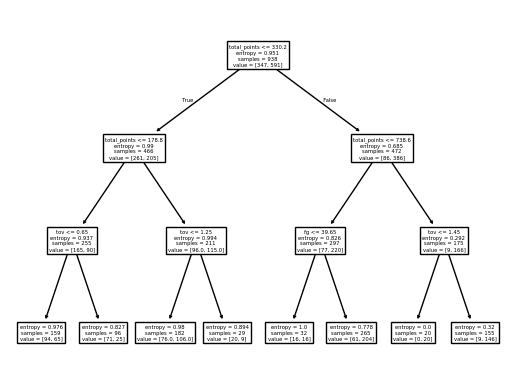

In [9]:
# Plot the fitted tree
plot_tree(DTC_grid, feature_names=X_train.columns.tolist())

In [10]:
DTC_grid.feature_importances_

array([0.88927012, 0.06858942, 0.        , 0.04214045])

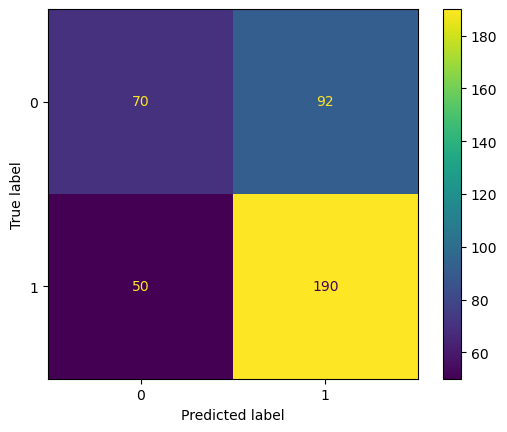

In [11]:
# Predict for the test set and plot the confusion matrix
y_pred = DTC_grid.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [12]:
# Predict the probabilities 

DTC_grid.predict_proba(X_train)

array([[0.68965517, 0.31034483],
       [0.23018868, 0.76981132],
       [0.41758242, 0.58241758],
       ...,
       [0.59119497, 0.40880503],
       [0.68965517, 0.31034483],
       [0.59119497, 0.40880503]])